
انواع روش های نایو بیز را نام برده و فرمول اصلی ریاضیاتی نایو بیز را بنویسید

Arg maxP(y)πP(x|y) 
سه روش اصلی عبارتند از :
    − برنولی
    -مولتی نامینال
    -گوسین

را توضیح دهید svm naivebase knn  اساس کار و روش انجام مدل های

knn: هر نقطه جدید را با نقاط همسایه ای مقایسه میکند و به هرکدام نزدیکتر بود جزو آن کلاس حساب میکند
روش کار هم محاسبه فاصله نقطه جدید از تمام یا بخشی از نقاط قبلی است و مینیمم فاصله تا یک نقاط  است تا کلاس نقطه مشخص شود.
svm : اقراض فضای نمونه ها به دو بخش بوسیله یک صفحه . 
روش کار پیدا کردن صفحه ای است که فاصله همه نقاط از آن ماکزیمم شود. 
naivebase: نایوبیز بر مبنای محاسبه احتمال قرارگرفتن نمونه درکلاس خاص را باتوجه به داده های آموزشی محاسبه میکند. 
روش کار با استفاده از فرمول بیز است که به شرط رخداد یک کلاس خاص احتمال قرارگرفتن نمونه در آن کلاس را محاسبه میکند. 

    

در مدل ها چه راهکاری را پیشنهاد میدهید TP TN FP FNبرای پیدا کردن     

به روش دستی هم میتوان بدست آورد و بردار پیش بینی را از لیبل تست مقایسه کنیم 
و موارد پیش بینی درست لیبل درست و بقیه موارد را حساب کنیم. فرمول آن نیز به صورت ذیل است:

   
svm = LinearSVC(random_state=0)
cv_results = cross_validate(svm, X, y, cv=5, scoring=confusion_matrix_scorer)
print(cv_results['test_tp'],cv_results['test_fn'],cv_results['test_fp'])

روی داده های گل زنبق تمام روش هایی را که اموخته اید امتحان کنید

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris_data = datasets.load_iris()
df = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
df["class"] = iris_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Figure size 400x400 with 0 Axes>

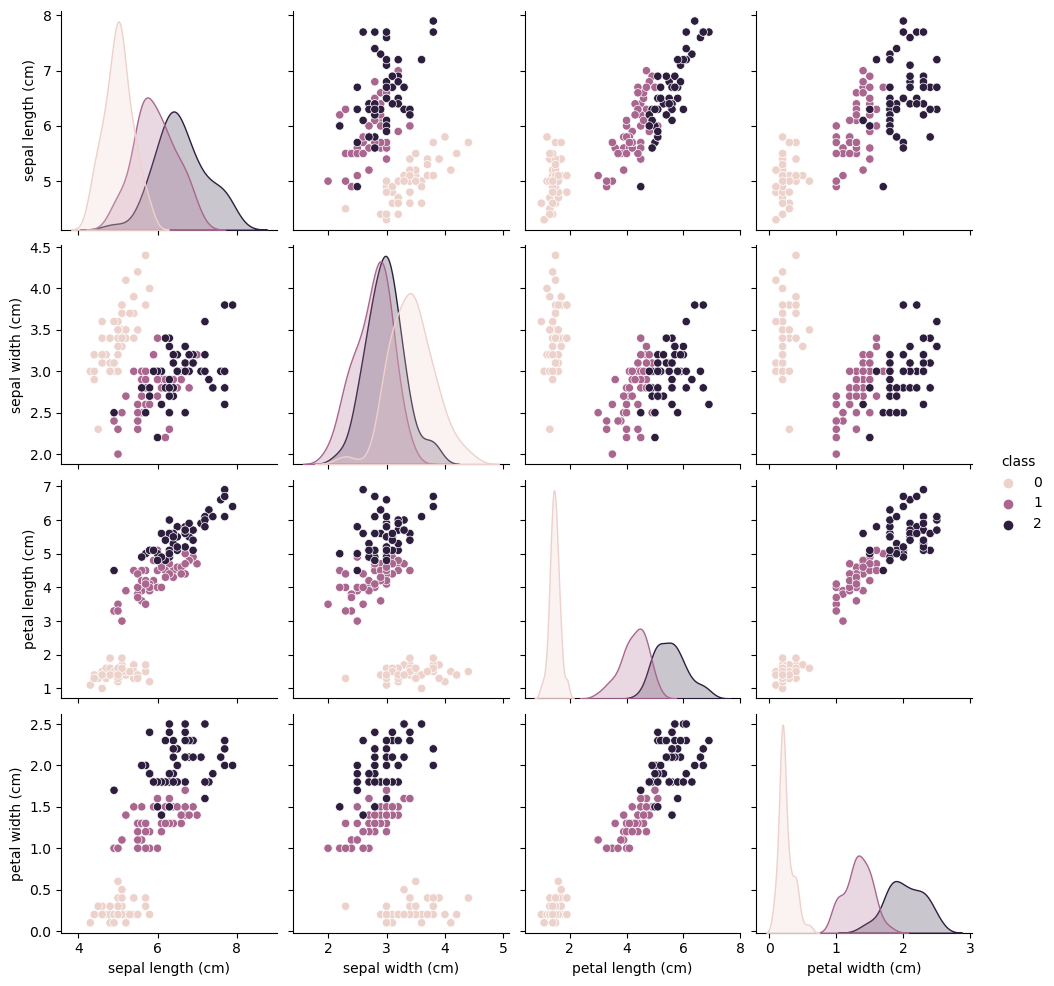

In [14]:
plt.figure(figsize=(4,4))
sns.pairplot(df, hue ='class' )

In [24]:
for col in df.columns:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    q_low = df[col].quantile(0.25) - 1.5 * IQR
    q_hi  = df[col].quantile(0.75) + 1.5 * IQR
    df = df[(df[col] < q_hi) & (df[col] > q_low)]

In [25]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.040411,3.806849,1.220548,1.020548
std,0.834093,0.397853,1.758042,0.759393,0.817643
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [3]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix ,classification_report , accuracy_score ,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier,Perceptron,LinearRegression, Ridge, SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split

import math

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85 )


In [7]:

sgr_model = make_pipeline(StandardScaler(),SGDClassifier(loss="hinge", penalty="l1", max_iter=1000))

sgr_model.fit(X_train, y_train)
y_predict = sgr_model.predict(X_test)
print('-----------   SGD  ---------')
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))


-----------   SGD  ---------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.88      0.88      0.88         8
           2       0.92      1.00      0.96        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  1  0]
 [ 0  7  1]
 [ 0  0 11]]


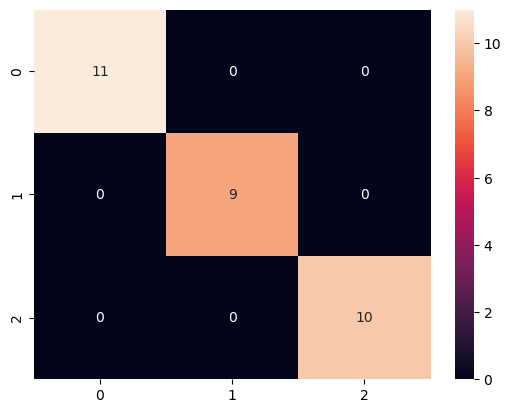

In [47]:

ax=sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xticks()
plt.show()

SGD Classifier_SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [28]:
clf = make_pipeline(StandardScaler(),Perceptron(penalty='l2'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('-----------   Perceptron  ---------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

-----------   Perceptron  ---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


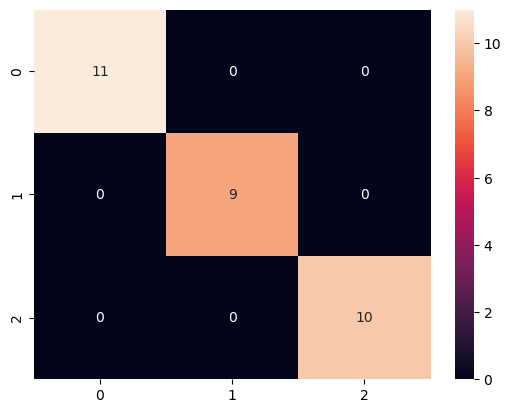

In [58]:

ax=sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xticks()
plt.show()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
print('------ LogisticRegression --------------')

pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('LR_model', LogisticRegression(C=8, penalty='l2', multi_class='auto',max_iter=1000))])

pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

------ LogisticRegression ------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


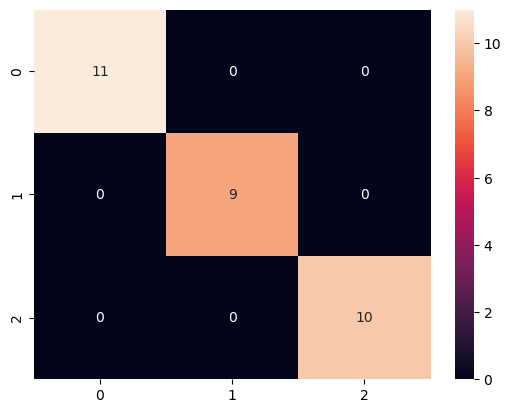

In [31]:
ax=sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xticks()
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('------ KNeighborsClassifier --------------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))



------ KNeighborsClassifier --------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


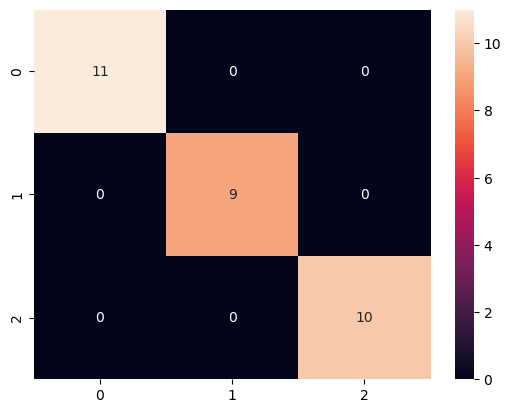

In [34]:
ax=sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xticks()
plt.show()

بالایی دارند را پاک کرده و دوباره مدلی که این کار روی آن تاثیر گذار است را امتحان کنید corrolationحال ستونی که 

  


<div dir = "rtl" style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=6 color=#F32500>
        <div  align=center>
              ابتدا با بررسی همبستگی ستون زیر حذف شد  :  
petal width (cm)    
            سپس با اجرای مجدد مدلها نتیجه بررسی شد
            میانگین مدلهاحدود ۷ درصد دقتشان کاهش داشت 
            و لاجستیک بهترین نتیجه با ۹۷ درصد شد
                    </div>
        <br/>
    </font>
</div>

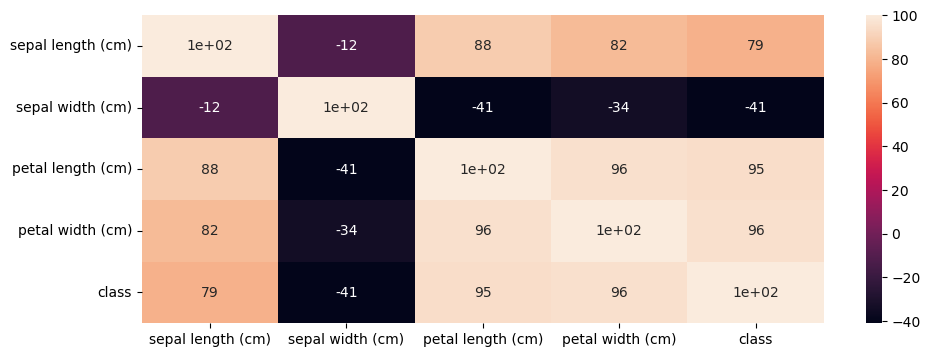

In [36]:
corr_date = df.corr().round(2)*100
fig = plt.figure(figsize =(11, 4)) 
ax=sns.heatmap(corr_date, annot=True)
plt.xticks()
plt.show()

In [43]:
X = df.iloc[:, [0,1,2]].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85 )


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('------ KNeighborsClassifier --------------')
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

------ KNeighborsClassifier --------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      1.00      0.90         9
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30

[[11  0  0]
 [ 0  9  0]
 [ 0  2  8]]


In [45]:
print('------ LogisticRegression --------------')

pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('LR_model', LogisticRegression(C=8, penalty='l2', multi_class='auto',max_iter=1000))])

pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

------ LogisticRegression --------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [46]:
clf = make_pipeline(StandardScaler(),Perceptron(penalty='l2'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('-----------   Perceptron  ---------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

-----------   Perceptron  ---------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.78      0.88         9
           2       0.91      1.00      0.95        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[11  0  0]
 [ 1  7  1]
 [ 0  0 10]]


In [47]:
clf = make_pipeline(StandardScaler(),Perceptron(penalty='l2'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('-----------   Perceptron  ---------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

-----------   Perceptron  ---------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.78      0.88         9
           2       0.91      1.00      0.95        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[11  0  0]
 [ 1  7  1]
 [ 0  0 10]]


### try svm on below dataset and get accuracy more than 95 

In [48]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [49]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [55]:
wine.data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [54]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC


In [57]:
X = wine.data.values
y = wine.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85 )

array([[1.270e+01, 3.550e+00, 2.360e+00, ..., 7.800e-01, 1.290e+00,
        6.000e+02],
       [1.229e+01, 3.170e+00, 2.210e+00, ..., 1.420e+00, 2.830e+00,
        4.060e+02],
       [1.356e+01, 1.730e+00, 2.460e+00, ..., 9.800e-01, 3.030e+00,
        1.120e+03],
       ...,
       [1.336e+01, 2.560e+00, 2.350e+00, ..., 7.000e-01, 2.470e+00,
        7.800e+02],
       [1.236e+01, 3.830e+00, 2.380e+00, ..., 5.600e-01, 1.580e+00,
        5.200e+02],
       [1.225e+01, 1.730e+00, 2.120e+00, ..., 1.000e+00, 3.170e+00,
        5.100e+02]])

In [ ]:
# for col in df.columns:
#     IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
#     q_low = df[col].quantile(0.25) - 1.5 * IQR
#     q_hi  = df[col].quantile(0.75) + 1.5 * IQR
#     df = df[(df[col] < q_hi) & (df[col] > q_low)]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
pipe = make_pipeline(StandardScaler(), SVC(C=1, kernel='poly',degree=3 , gamma=0.05 , coef0=1))
pipe.fit(X_train, y_train)
predict = pipe.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

